# Part 1

In [4]:
import psycopg

# define connection parameters
dbname = 'everything2024'
user = 'uds6227'
password = 'DookDik009yay!'
host = 'pg.mlds.northwestern.edu'
port = '5432'

In [5]:
# create a connection
connection = psycopg.connect(
    dbname=dbname,
    user=user,
    password=password,
    host=host,
    port=port
)

In [6]:
# create a cursor
cursor = connection.cursor()

In [7]:
# execute a query
cursor.execute("SELECT * FROM mlds422.movies") # from schema mlds422, table movies
result = cursor.fetchall()

In [5]:
import pandas as pd

In [6]:
# create DataFrame
df = pd.DataFrame(result)

In [7]:
# close the cursor and connection
cursor.close()
connection.close()

In [8]:
# assign column names
df.columns = [
    'movie_id', 
    'movie_title',
    'movie_info', 
    'rating',
    'genre',
    'directors',
    'in_theaters_date',
    'on_streaming_date',
    'runtime_in_minutes',
    'critic_rating',
    'critic_count',
    'audience_rating',
    'audience_count'
]

In [9]:
# check data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            16638 non-null  int64  
 1   movie_title         16638 non-null  object 
 2   movie_info          16614 non-null  object 
 3   rating              11776 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   in_theaters_date    15823 non-null  object 
 7   on_streaming_date   16636 non-null  object 
 8   runtime_in_minutes  16483 non-null  float64
 9   critic_rating       16638 non-null  int64  
 10  critic_count        16638 non-null  int64  
 11  audience_rating     16381 non-null  float64
 12  audience_count      16386 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 1.7+ MB


In [10]:
df.head()

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
0,1,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-06-29,83.0,49,144,53.0,254287.0
1,2,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90.0,86,140,64.0,11567.0
2,3,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,68,22,53.0,14670.0
3,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",None,"Classics, Drama",Sidney Lumet,2057-04-13,2001-03-06,95.0,100,51,97.0,105000.0
4,5,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,2054-01-01,2003-05-20,127.0,89,27,74.0,68860.0


In [11]:
# Save the DataFrame to a pickle file
df.to_pickle("raw_data.pkl")

# Load the DataFrame back
df = pd.read_pickle("raw_data.pkl")

# Part 2

## 1. Find the number of movies that were released in theatres each year. 

In [12]:
# change data type to datetime
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'], format='%y-%m-%d')
df['on_streaming_date'] = pd.to_datetime(df['on_streaming_date'], format='%y-%m-%d')

In [13]:
# create DataFrame counting
t_year = df['in_theaters_date'].dt.year.value_counts(ascending=True).astype(int)
t_year = t_year.reset_index()
t_year.columns = ['Year', 'Count']

In [14]:
t_year.head()

,Year,Count
0,2021.0,2
1,2026.0,4
2,2020.0,5
3,2022.0,5
4,2023.0,5


In [15]:
t_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    100 non-null    float64
 1   Count   100 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


In [16]:
import matplotlib.pyplot as plt

In [17]:
# reset 'Year' to be index
t_year = t_year.set_index('Year')

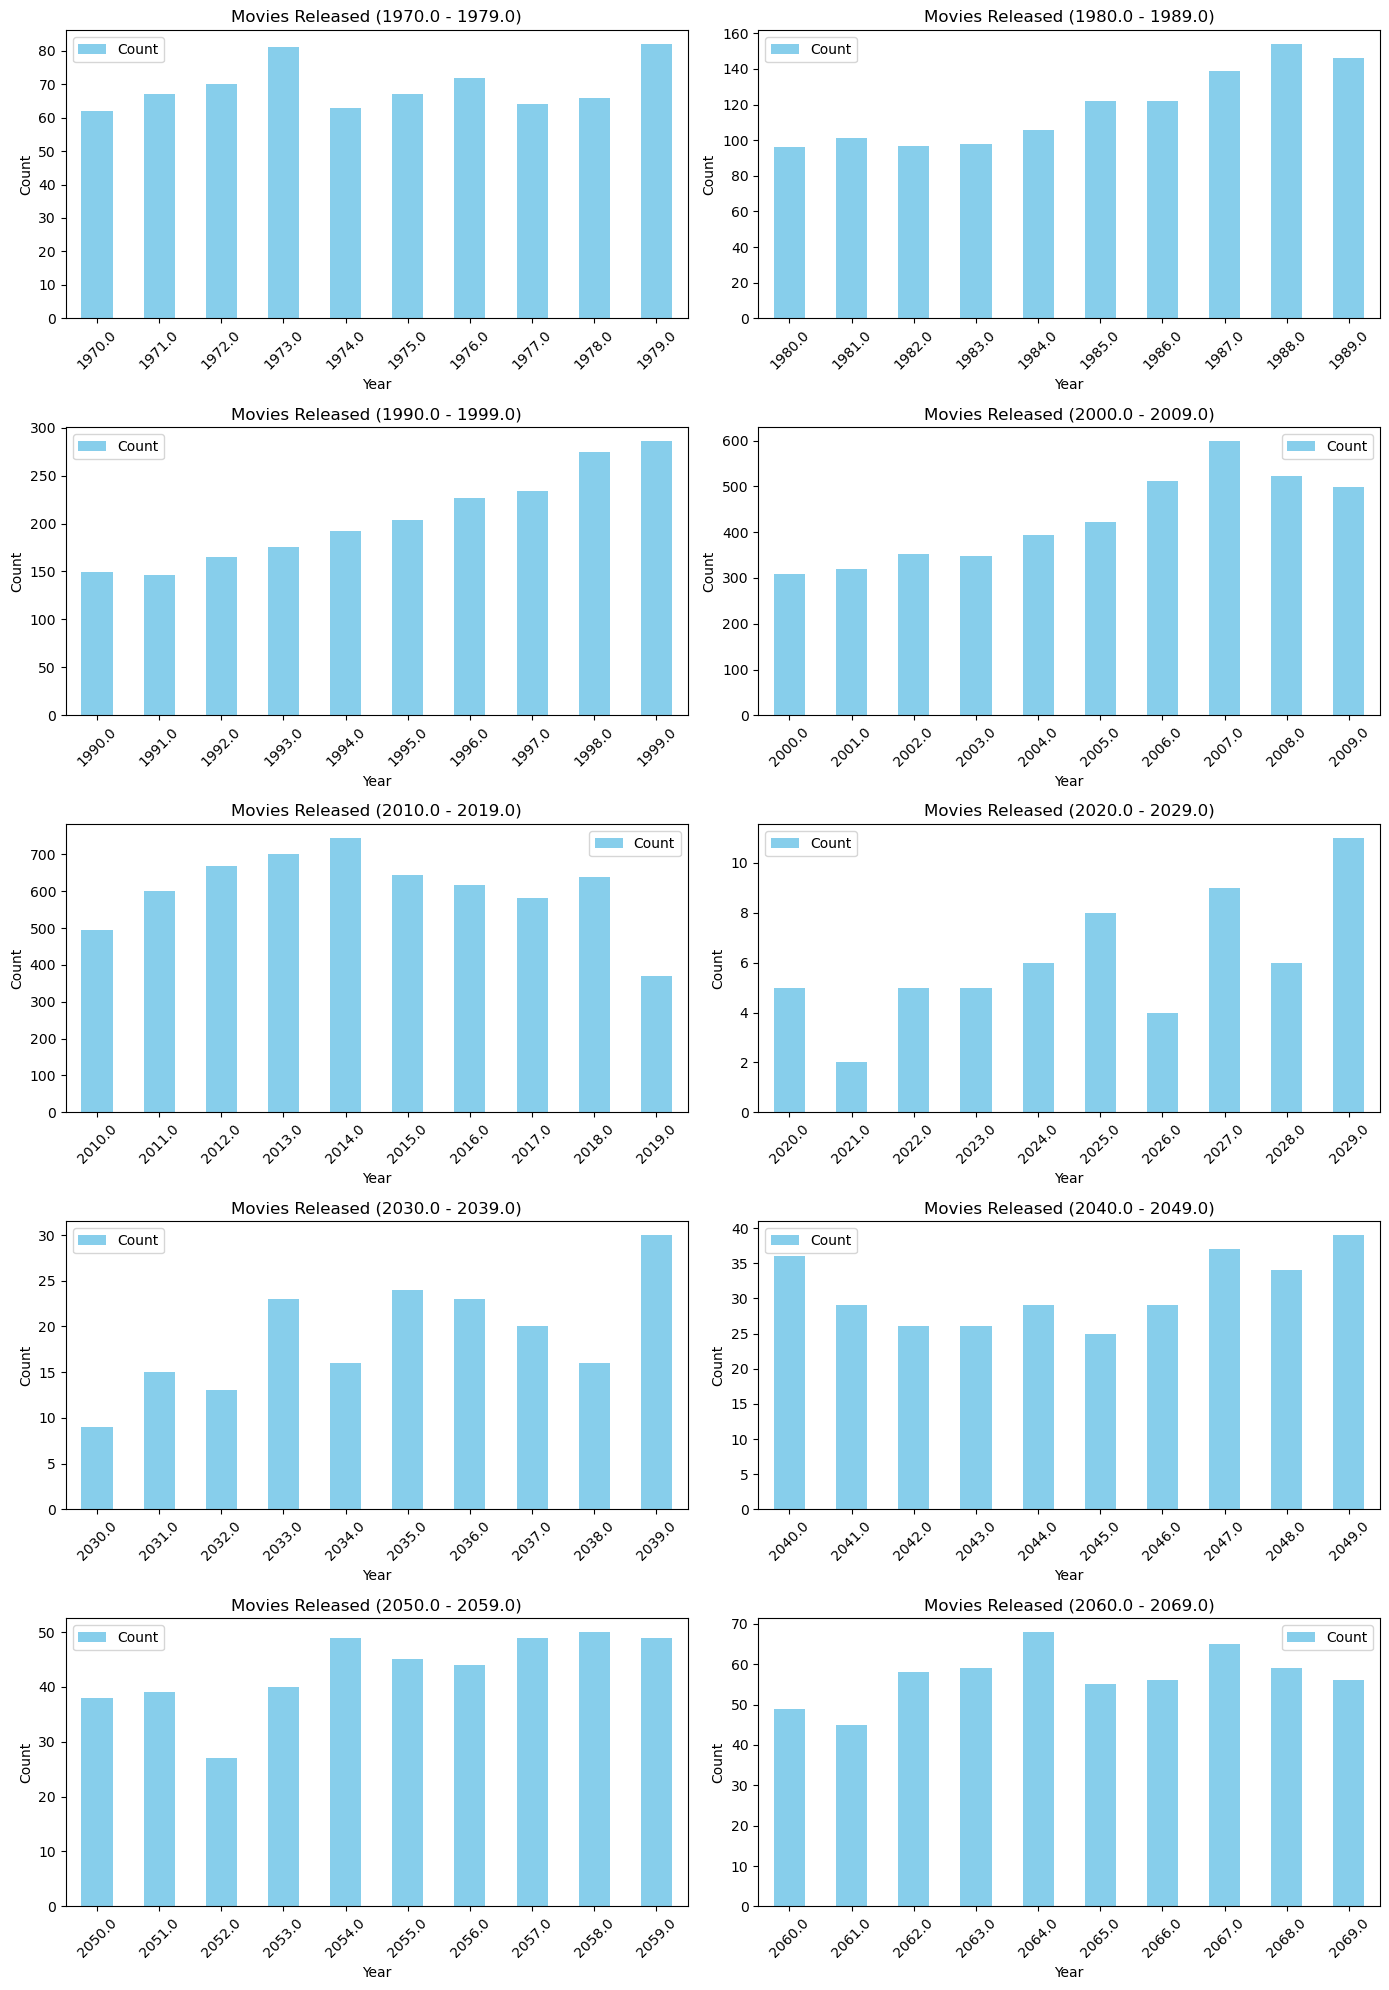

In [18]:
# sort by year
t_year = t_year.sort_index()

# define the chunk size (10 years per graph)
chunk_size = 10
years = t_year.index
chunks = [years[i:i + chunk_size] for i in range(0, len(years), chunk_size)]

# set up the grid for subplots (2 plots per row, 5 rows)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))  # 5 rows, 2 columns
axes = axes.flatten()

# plot each chunk in a subplot
for i, chunk in enumerate(chunks):
    # subset the data for the current chunk
    subset = t_year.loc[chunk]
    
    # plot on the corresponding subplot axis
    subset.plot(kind='bar', ax=axes[i], color='skyblue')
    
    # customize each plot
    axes[i].set_title(f'Movies Released ({chunk[0]} - {chunk[-1]})')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# remove empty subplots if there are fewer than 10 chunks
for j in range(len(chunks), len(axes)):
    fig.delaxes(axes[j])

# adjust layout to avoid overlap
plt.tight_layout()
plt.show()

The data has years that surpass current year (2024), this is more likely to be error rather than movie plan released by film companies since it goes as far as 40 years ahead. After randomly checking the data, these movies appear to be in the 90s. Therefore, we should change the movie years that are more than 2019 to the 90s, for example, 2020 to 1920. 

In [19]:
# Modify the in_theaters_date column 
df['in_theaters_date'] = df['in_theaters_date'].apply(
    lambda x: x.replace(year=(x.year - 100)) if x.year > 2019 else x
)

In [20]:
# Save the DataFrame to a pickle file
df.to_pickle("cleaned_data.pkl")

# Load the DataFrame back
df = pd.read_pickle("cleaned_data.pkl")

## 2. Looking only at movies that were released in theatres before 2010

In [21]:
# create DataFrame for movies released before 2010
before_2010 = df[df['in_theaters_date'].dt.year < 2010]

In [22]:
before_2010.head()

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
2,3,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,68,22,53.0,14670.0
3,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",None,"Classics, Drama",Sidney Lumet,1957-04-13,2001-03-06,95.0,100,51,97.0,105000.0
4,5,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,1954-01-01,2003-05-20,127.0,89,27,74.0,68860.0
5,6,"10,000 B.C.",A young outcast from a primitive tribe is forc...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,2008-03-07,2008-06-24,109.0,8,148,37.0,411087.0
6,7,The 39 Steps,A man in London tries to help a counterespiona...,None,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,1935-08-01,2035-06-06,87.0,96,47,86.0,23827.0


In [23]:
# 5 highest reated movies by critics
before_2010.sort_values(by='critic_rating', ascending=False).head(5)

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
14217,14199,The Great Silence (Il grande silenzio),Italian filmmaker Sergio Corbucci directed thi...,None,"Art House & International, Drama, Western",Sergio Corbucci,1968-01-01,2004-01-27,105.0,100,11,90.0,6750.0
3063,3022,The Band Wagon,"A lavish, enduring backstage musical from Vinc...",None,"Classics, Comedy, Drama, Musical & Performing ...",Vincente Minnelli,1953-08-07,2005-03-15,112.0,100,18,82.0,4679.0
534,515,The Invisible Man,"A mysterious stranger, his face swathed in ban...",None,"Classics, Comedy, Horror, Science Fiction & Fa...",James Whale,1933-11-13,2001-08-28,72.0,100,37,85.0,11089.0
10164,10121,Multiple Maniacs,"John Waters' gloriously grotesque, unavailable...",NC17,"Comedy, Horror",John Waters,1970-04-10,2017-03-21,90.0,100,20,73.0,1329.0
6031,5995,Father (Father: Diary of One Week),"In The Father (Apa), Hungarian filmmaker Istva...",PG-13,"Art House & International, Drama",Istv√°n Szab√≥,1967-10-04,2004-08-03,89.0,100,5,77.0,372.0


In [24]:
# 5 highest rated movies by the general audience
before_2010.sort_values(by='audience_rating', ascending=False).head(5)

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
1846,1801,Ice People,While the mainstream world rolls on indefinite...,None,"Documentary, Special Interest",Anne Aghion,2008-04-26,2009-11-10,77.0,89,9,100.0,37.0
222,216,Prima Ballerina,In the grand tradition of the Ballet Russes co...,None,"Art House & International, Special Interest",Laurent Gentot,2009-01-16,2009-12-08,NaN,81,26,100.0,24.0
3229,3197,Been Rich All My Life,This documentary follows the most unlikely tro...,None,"Documentary, Musical & Performing Arts, Specia...",Heather MacDonald,2006-07-21,2006-11-21,81.0,80,30,100.0,961.0
1283,1289,La Ciudad (The City),This American film (in Spanish) focuses on Lat...,None,"Art House & International, Drama",David Riker,1998-09-13,2005-06-14,88.0,83,12,100.0,313.0
6747,6704,The Godfather,Popularly viewed as one of the best American f...,R,Drama,Francis Ford Coppola,1972-03-24,2001-10-09,175.0,98,91,98.0,732931.0


## 3. Create a new DataFrame containing only “popular” movies that were released in theatres before 2010

In [25]:
# calculate average number of audience reviews
avg_audience = df['audience_count'].mean()
print(avg_audience)

152479.70108629318


In [26]:
# create DataFrame of popular movies before 2010 that have number of audience reviews higher than average
popular = before_2010[before_2010['audience_count'] > avg_audience]
popular.head()

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
5,6,"10,000 B.C.",A young outcast from a primitive tribe is forc...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,2008-03-07,2008-06-24,109.0,8,148,37.0,411087.0
26,26,Tristan & Isolde,"In the medieval legend of Tristan and Isolde, ...",PG-13,"Drama, Science Fiction & Fantasy, Romance",Kevin Reynolds,2006-01-13,2006-04-25,99.0,31,121,71.0,220945.0
32,31,Ultraviolet,In the late 21st a disease called Hemophagia h...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,2006-03-03,2006-06-27,88.0,8,83,30.0,279966.0
53,51,Aliens,"Big-budget special effects, swiftly paced acti...",R,"Action & Adventure, Horror, Science Fiction & ...",James Cameron,1986-07-18,1999-06-01,138.0,99,72,94.0,429158.0
88,85,The Happening,"The Happening' is a lightning-paced, heart-pou...",R,"Drama, Mystery & Suspense, Science Fiction & F...",M. Night Shyamalan,2008-06-11,2008-10-07,90.0,18,179,24.0,370131.0


In [27]:
# 5 highest rated movies by critics
popular.sort_values(by='critic_rating', ascending=False).head(5)

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
4418,4390,Citizen Kane,This is the labyrinthine study of the life of ...,PG,"Classics, Drama, Mystery & Suspense",Orson Welles,1941-05-01,2001-09-25,119.0,100,84,90.0,158857.0
9636,9588,Mary Poppins,Practically Perfect In Every Way' Mary Poppins...,G,"Classics, Comedy, Kids & Family, Musical & Per...",Robert Stevenson,1964-08-26,1998-03-24,139.0,100,50,86.0,682310.0
11227,11194,Pinocchio,When the gentle woodcarver Geppetto (Christian...,G,"Animation, Kids & Family, Musical & Performing...","Hamilton Luske, Ben Sharpsteen, Walt Disney, W...",1940-02-07,2009-03-10,88.0,100,51,73.0,279248.0
15439,15415,Toy Story,"Woody, a traditional pull-string talking cowbo...",G,"Animation, Comedy, Kids & Family",John Lasseter,1995-11-22,2001-03-20,80.0,100,88,92.0,1109209.0
13557,13528,The Terminator,A Cyborg has been sent from the future on a de...,R,"Action & Adventure, Science Fiction & Fantasy",James Cameron,1984-10-26,1997-09-03,108.0,100,61,89.0,775856.0


In [28]:
# 5 highest rated movies by the general audience
popular.sort_values(by='audience_rating', ascending=False).head(5)

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
12463,12436,The Shawshank Redemption,"In 1946, a banker named Andy Dufresne (Tim Rob...",R,Drama,Frank Darabont,1994-09-10,1998-01-27,142.0,90,71,98.0,885508.0
6747,6704,The Godfather,Popularly viewed as one of the best American f...,R,Drama,Francis Ford Coppola,1972-03-24,2001-10-09,175.0,98,91,98.0,732931.0
12237,12205,Schindler's List,"Based on a true story, Steven Spielberg's Schi...",R,Drama,Steven Spielberg,1993-12-15,2004-03-09,196.0,97,95,97.0,411166.0
14200,14180,"The Good, the Bad and the Ugly",In the last and the best installment of his so...,R,Western,Sergio Leone,1966-12-23,1997-11-18,161.0,97,68,97.0,239453.0
851,835,GoodFellas,Martin Scorsese explores the life of organized...,R,Drama,Martin Scorsese,1990-09-19,1997-03-26,146.0,96,95,97.0,428871.0


## 4. Using your new DataFrame (popular movies released in theatres before 2010), answer the following questions about the rating column

In [29]:
# percent of movies fall under each type of rating (R, PG-13, etc.)
rating = popular['rating'].value_counts(normalize=True, ascending=True) * 100
print(rating)

rating
G         5.808824
PG       19.852941
R        34.632353
PG-13    39.705882
Name: proportion, dtype: float64


This shows that most popular movies before 2010 target more towards teenagers and adults since the rating are mostly suitable for people who are older than 13 as PG-13 and R rate are more than 75 percent of total when combine together.

In [30]:
# create DataFreame displaying average critic rating for each rating (R, PG-13, etc.)
critic_rate = popular.groupby('rating')['critic_rating'].mean().reset_index() 
critic_rate

,rating,critic_rating
0,G,73.860759
1,PG,56.562963
2,PG-13,47.940741
3,R,62.214437


In [31]:
# create DataFreame displaying average audience rating for each rating (R, PG-13, etc.)
audience_rate = popular.groupby('rating')['audience_rating'].mean().reset_index()
audience_rate

,rating,audience_rating
0,G,72.696203
1,PG,63.551852
2,PG-13,61.275926
3,R,71.076433


In [32]:
import numpy as np

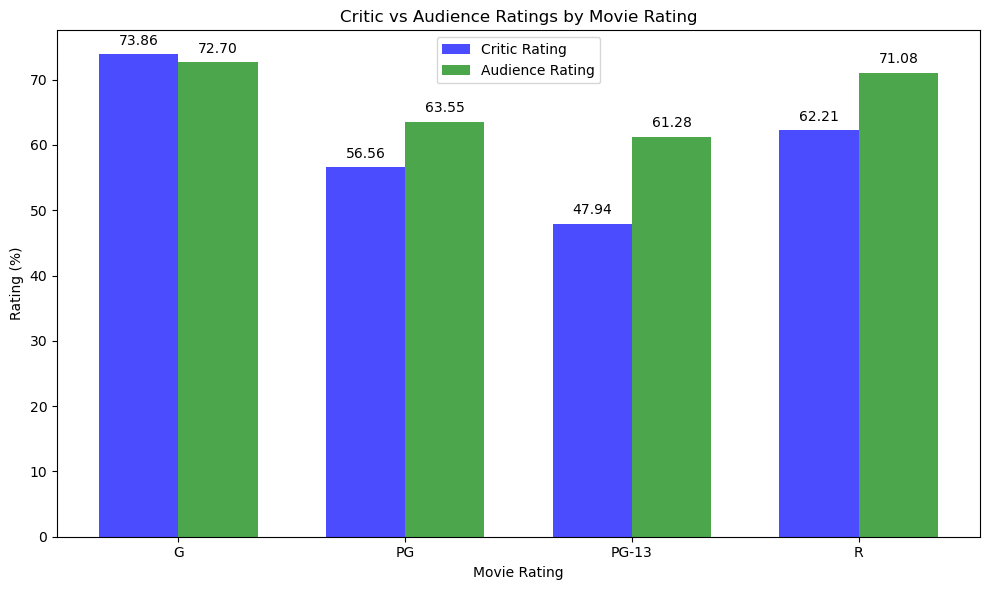

In [33]:
# set up bar positions
x = np.arange(len(critic_rate['rating']))  # The label locations
width = 0.35  # The width of the bars

# create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# plot critic ratings
critic_bars = ax.bar(x - width/2, critic_rate['critic_rating'], width, label='Critic Rating', color='blue', alpha=0.7)

# plot audience ratings
audience_bars = ax.bar(x + width/2, audience_rate['audience_rating'], width, label='Audience Rating', color='green', alpha=0.7)

# add labels, title, and legend
ax.set_xlabel('Movie Rating')
ax.set_ylabel('Rating (%)')
ax.set_title('Critic vs Audience Ratings by Movie Rating')
ax.set_xticks(x)
ax.set_xticklabels(critic_rate['rating'])
ax.legend()

# add value labels to bars
for bars in [critic_bars, audience_bars]:
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,
            f'{bar.get_height():.2f}',
            ha='center',
            va='bottom'
        )

# show the plot
plt.tight_layout()
plt.show()

In most Movie Rating (G, PG, PG-13, R) audience seems to give higher rating in average than critics do. With PG-13 as the lowest rating and G as the highest.

## 5. Create a pair plot of the new DataFrame. What are 3 insights you can take away from looking at the pair plot?

In [34]:
import seaborn as sns

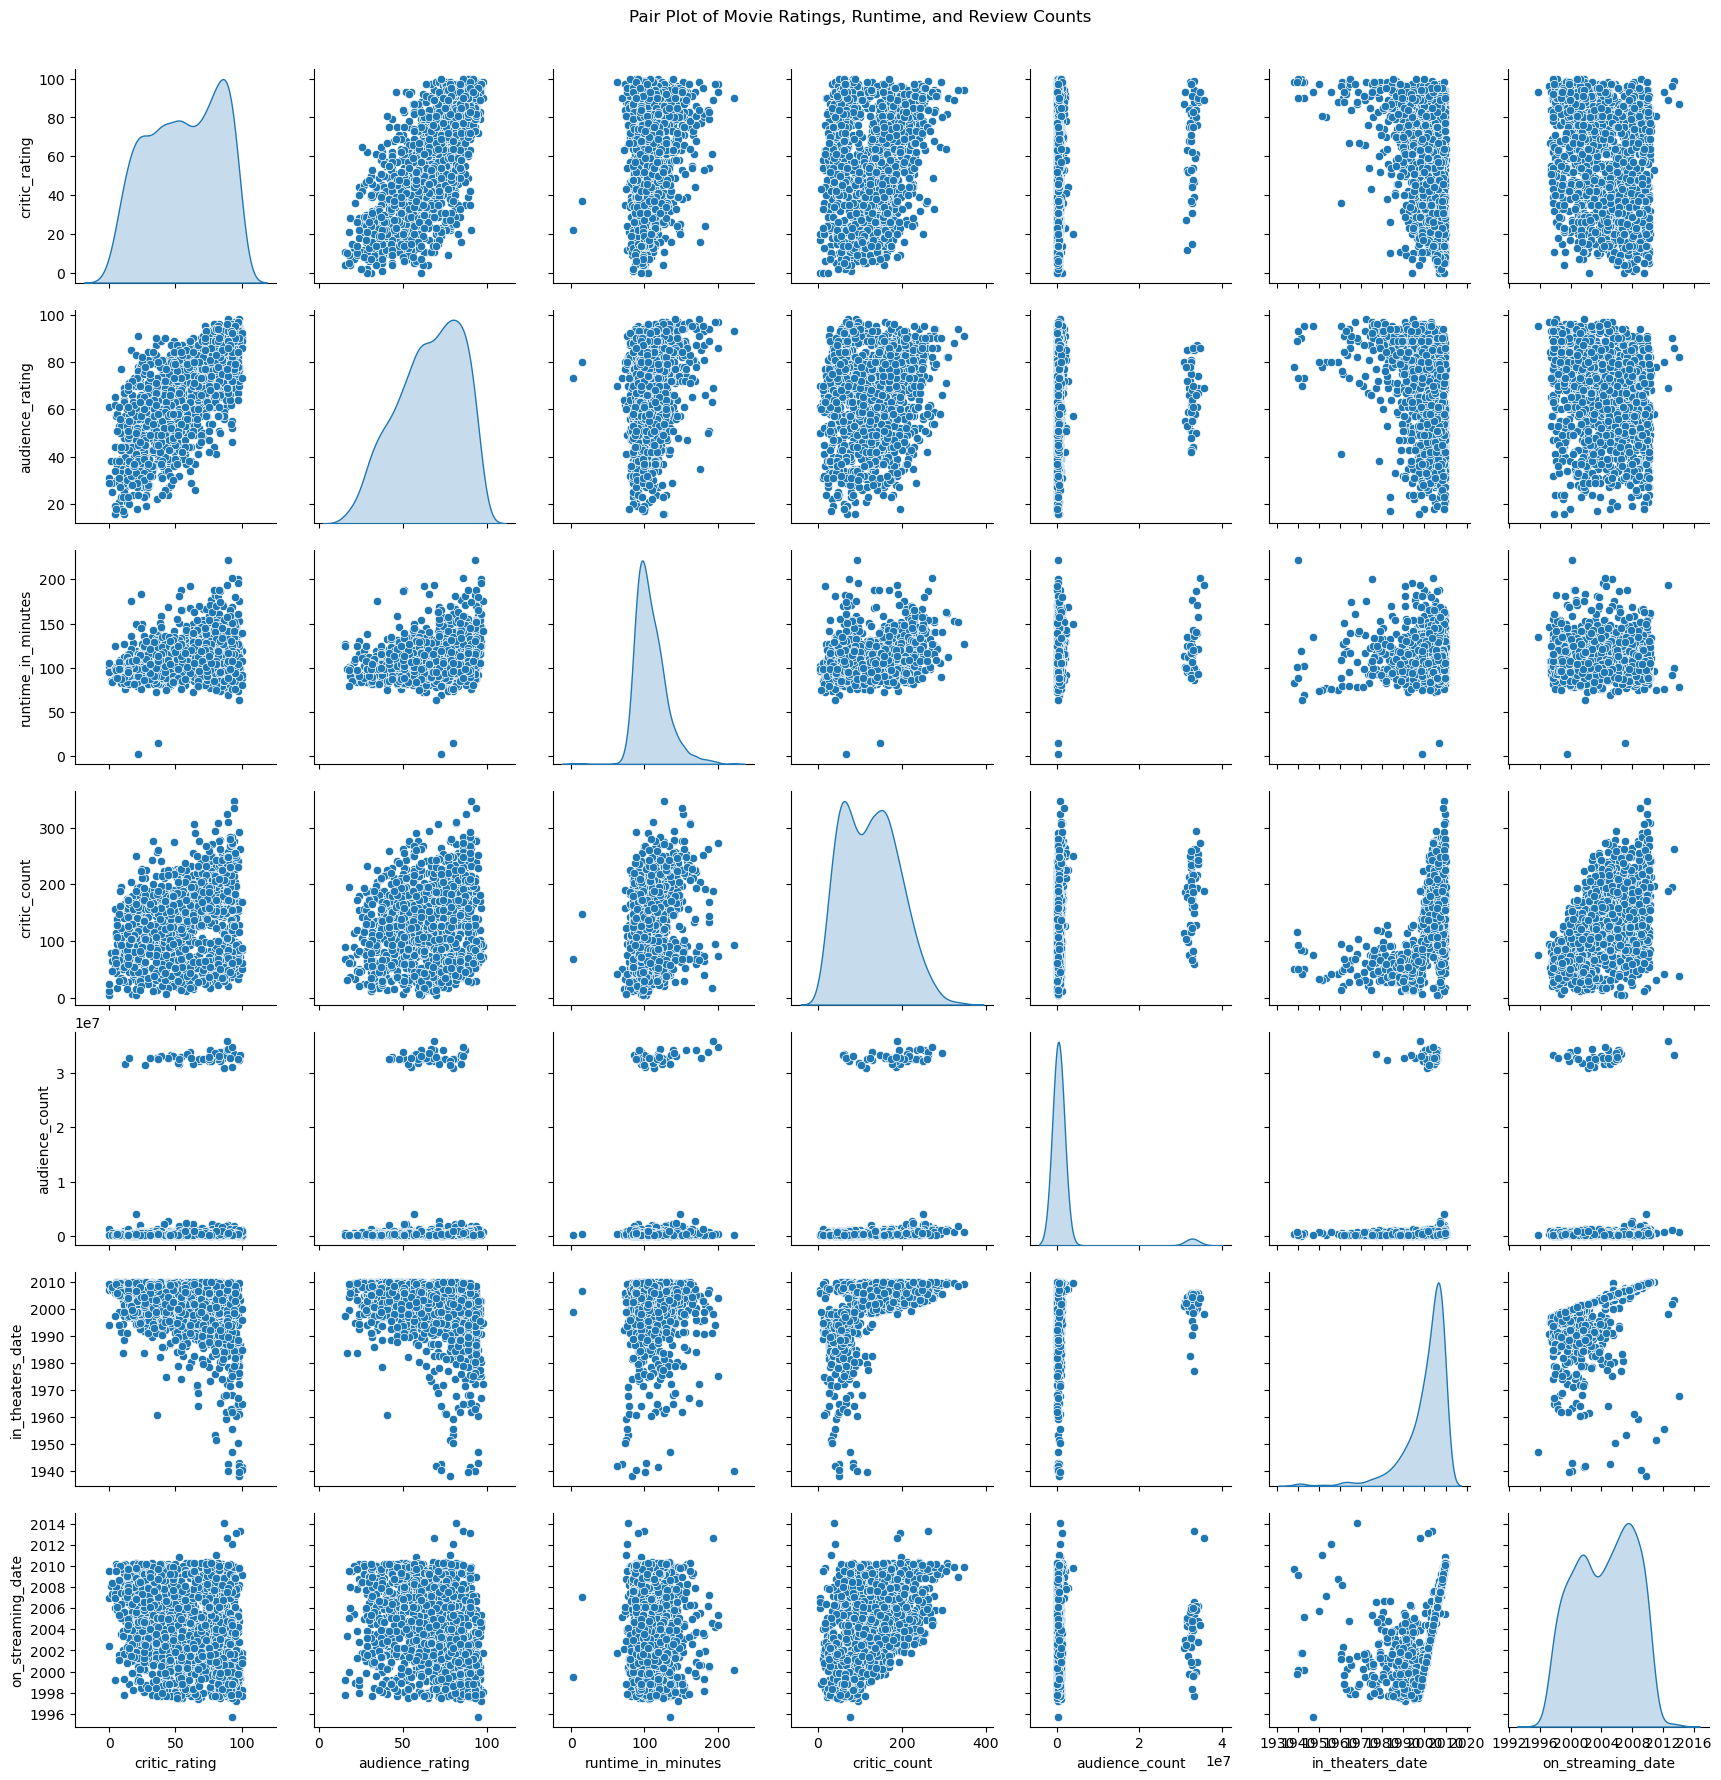

In [35]:
# Pair plot focusing on key numerical columns
sns.pairplot(
    popular,
    vars=['critic_rating', 'audience_rating', 'runtime_in_minutes', 'critic_count', 'audience_count', 'in_theaters_date', 'on_streaming_date'],
    kind='scatter',
    diag_kind='kde',
#    hue='genre',  # Use 'rating' for color differentiation
#    palette='Set2'
)

plt.suptitle("Pair Plot of Movie Ratings, Runtime, and Review Counts", y=1.02)
plt.show()


Insight
1. audience rating and critic rating seem to have positive relationship (Higher audience rating usually mean higher critic rating)
2. movies with shorter run time seem to have more variance in audience and critic rating, meaning most movies may concentrated on shorter runtime
3. recent on streaming date seem to have less variance in in theaters date than the older dates, showing new movies are put on streaming almost immediately after released

## 6. Using either pandas or data visualizations, find 3 more insights using any columns in the new DataFrame. 

C:\Users\Apits\AppData\Local\Temp\ipykernel_43208\108285188.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_genres, x='genre', y='audience_count', palette='Blues_d')


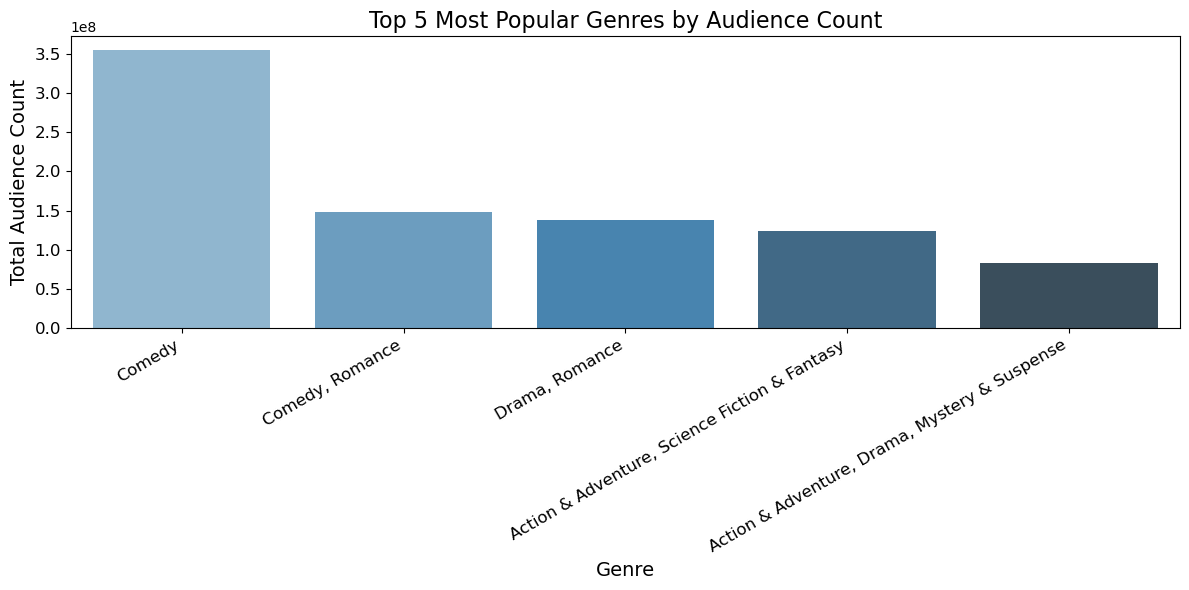

In [36]:
# 1st insight

# aggregate audience count by genre
genre_popularity = popular.groupby('genre')['audience_count'].sum().reset_index()

# sort by popularity and select the top 5
top_5_genres = genre_popularity.sort_values(by='audience_count', ascending=False).head(5)

# plot the top 5 genres
plt.figure(figsize=(12, 6))  # increase the figure size for better readability
sns.barplot(data=top_5_genres, x='genre', y='audience_count', palette='Blues_d')
plt.title('Top 5 Most Popular Genres by Audience Count', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Audience Count', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)  # rotate and align x-axis labels for readability
plt.yticks(fontsize=12)
plt.tight_layout()  # automatically adjust the layout
plt.show()

C:\Users\Apits\AppData\Local\Temp\ipykernel_43208\3205773962.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_freq, x='genre', y='count', palette='muted')


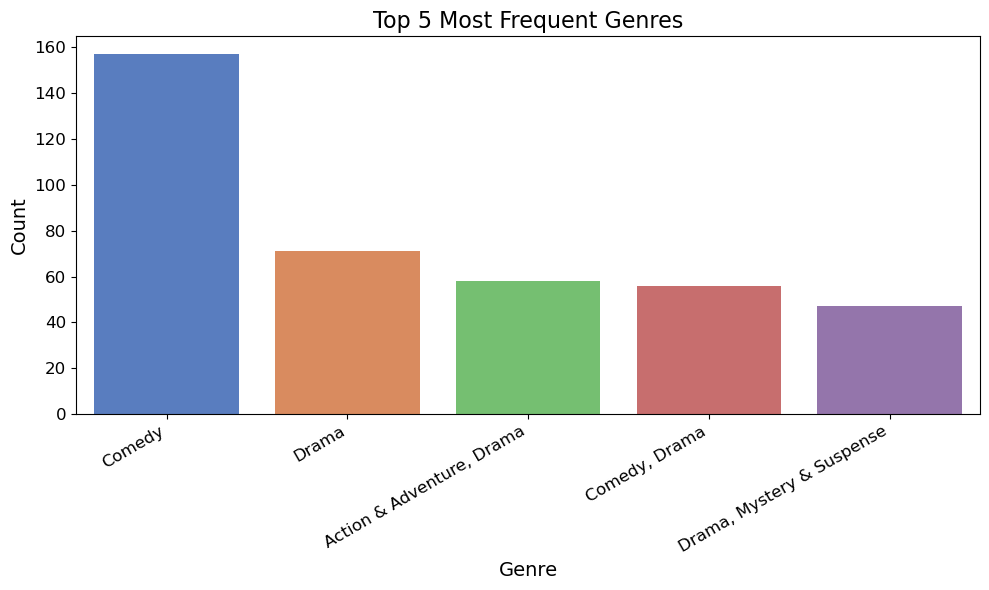

In [37]:
# 2nd insight

# count the occurrences of each genre
genre_counts = popular['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# select the top 5 genres
top_5_freq = genre_counts.head(5)

# plot the top 5 genres
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_freq, x='genre', y='count', palette='muted')
plt.title('Top 5 Most Frequent Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [38]:
# 3rd insight

# extract the year from the `in_theaters_date` column
popular['year'] = popular['in_theaters_date'].dt.year

# group by year and find the most frequent genre in each year
most_produced_genres = popular.groupby('year')['genre'].agg(lambda x: x.value_counts().idxmax()).reset_index()
most_produced_genres.columns = ['Year', 'Most Produced Genre']

most_produced_genres

C:\Users\Apits\AppData\Local\Temp\ipykernel_43208\1407248540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular['year'] = popular['in_theaters_date'].dt.year


,Year,Most Produced Genre
0,1937,"Animation, Classics, Kids & Family, Science Fi..."
1,1939,"Classics, Drama, Romance"
2,1940,"Animation, Kids & Family, Musical & Performing..."
3,1941,"Classics, Drama, Mystery & Suspense"
4,1942,"Classics, Drama, Romance"
5,1946,"Classics, Drama, Kids & Family, Science Fictio..."
6,1950,"Animation, Classics, Kids & Family, Science Fi..."
7,1951,"Animation, Classics, Comedy, Kids & Family, Sc..."
8,1953,"Animation, Kids & Family, Musical & Performing..."
9,1955,"Animation, Drama, Kids & Family"


Insight
1. From the first graph, Top 5 Most Popular Genres by Audience Count, we can see that the 5 most popular genres are comedy, comedy/romance, drama/romance, Action/Adventure/Science Fiction/Fantast, and Action/Adventure/Drama/Mystery/Suspense.
2. From the second graph, Top 5 Most Frequent Genres, we can see that the 5 most frequently produced genres are comedy, drama, Action/Adventure/Drama, Comedy/Drama, and Drama/Mystery/Suspense
3. From the table above, we can see that the most produced genre after 1991 seem to lean more towards comedy while the top genre of the years before that have more varieties.

# Part 3

## 7. Split the data into a training and test set, with the training data including movies released in theatres before 2010 and the test data including movies released in theatres in 2010 and after

In [39]:
# extract the year from `in_theaters_date`
df['year'] = pd.to_datetime(df['in_theaters_date']).dt.year

# split the data into training and test sets
train_data = df[df['year'] < 2010]  # movies released before 2010
test_data = df[df['year'] >= 2010]  # movies released in 2010 or later

In [40]:
train_data.shape

(9764, 14)

In [41]:
test_data.shape

(6059, 14)

In [42]:
train_data.head()

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count,year
2,3,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,68,22,53.0,14670.0,1979.0
3,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",None,"Classics, Drama",Sidney Lumet,1957-04-13,2001-03-06,95.0,100,51,97.0,105000.0,1957.0
4,5,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,1954-01-01,2003-05-20,127.0,89,27,74.0,68860.0,1954.0
5,6,"10,000 B.C.",A young outcast from a primitive tribe is forc...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,2008-03-07,2008-06-24,109.0,8,148,37.0,411087.0,2008.0
6,7,The 39 Steps,A man in London tries to help a counterespiona...,None,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,1935-08-01,2035-06-06,87.0,96,47,86.0,23827.0,1935.0


In [43]:
test_data.head()

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count,year
0,1,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-06-29,83.0,49,144,53.0,254287.0,2010.0
1,2,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90.0,86,140,64.0,11567.0,2010.0
101,98,Fireflies in the Garden,"To an outsider, the Taylors are the very pictu...",R,Drama,Dennis Lee (III),2011-10-14,2012-02-07,98.0,22,54,45.0,45150.0,2011.0
134,2956,The Back-up Plan,A romantic comedy centered on a woman who conc...,PG-13,"Comedy, Romance",Alan Poul,2010-04-23,2010-08-24,104.0,18,145,46.0,135533.0,2010.0
136,131,The Oxford Murders,When an elderly woman is viciously murdered in...,R,"Art House & International, Drama, Horror, Myst...",√Ålex de la Iglesia,2010-08-06,2010-10-05,110.0,9,11,33.0,14548.0,2010.0


## 8. If your goal is to predict the critic_rating before the first critic or audience rating gets posted for a movie, which columns in the data should you NOT use to create features? Update your training and test data sets to NOT include these columns

In [44]:
# List of columns to exclude
columns_to_exclude = ['movie_info','critic_rating', 'critic_count', 'audience_rating', 'audience_count']

# update training and test datasets by dropping the columns
X_train = train_data.drop(columns=columns_to_exclude)
X_test = test_data.drop(columns=columns_to_exclude)

In [45]:
X_train.head()

,movie_id,movie_title,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,year
2,3,10,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,1979.0
3,4,12 Angry Men (Twelve Angry Men),None,"Classics, Drama",Sidney Lumet,1957-04-13,2001-03-06,95.0,1957.0
4,5,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,1954-01-01,2003-05-20,127.0,1954.0
5,6,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,2008-03-07,2008-06-24,109.0,2008.0
6,7,The 39 Steps,None,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,1935-08-01,2035-06-06,87.0,1935.0


In [46]:
X_test.head()

,movie_id,movie_title,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,year
0,1,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-06-29,83.0,2010.0
1,2,Please Give,R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90.0,2010.0
101,98,Fireflies in the Garden,R,Drama,Dennis Lee (III),2011-10-14,2012-02-07,98.0,2011.0
134,2956,The Back-up Plan,PG-13,"Comedy, Romance",Alan Poul,2010-04-23,2010-08-24,104.0,2010.0
136,131,The Oxford Murders,R,"Art House & International, Drama, Horror, Myst...",√Ålex de la Iglesia,2010-08-06,2010-10-05,110.0,2010.0


We should remove column: movie_info, critic_rating, critic_count, audience_rating, and audience_count. Because movie info are descriptive data, we cannot use them in prediction. Moreover, critic_count, audience_rating, and audience_count are information that we will not have while predicting the critic rating since we're trying to predict the first critic rating that is not yet received any review. Lastly, since we're trying to predict critic_rating, naturally it shouldn't be one of the predictors.

## 9. Using only the training data, create a new DataFrame containing the following ID column and features

In [47]:
# add column kid friendly
X_train['kid_friendly'] = train_data['rating'].apply(lambda x: 1 if x in ['G', 'PG'] else 0)
X_train.head()

,movie_id,movie_title,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,year,kid_friendly
2,3,10,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,1979.0,0
3,4,12 Angry Men (Twelve Angry Men),None,"Classics, Drama",Sidney Lumet,1957-04-13,2001-03-06,95.0,1957.0,0
4,5,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,1954-01-01,2003-05-20,127.0,1954.0,1
5,6,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,2008-03-07,2008-06-24,109.0,2008.0,0
6,7,The 39 Steps,None,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,1935-08-01,2035-06-06,87.0,1935.0,0


In [48]:
# Split the genre strings by ', ' to get individual genres
X_train['genre_split'] = X_train['genre'].str.split(', ')

# Explode the genres into multiple rows per movie_id
genre_exploded = X_train.explode('genre_split')

# Create dummy variables
genre_dummy = pd.get_dummies(genre_exploded[['movie_id','genre_split']], prefix='genre').astype(int)

# Aggregate rows with the same index by taking the max for each dummy column
genre_dummy = genre_dummy.groupby(genre_dummy.index).max()

# result
genre_dummy.head()


,movie_id,genre_Action & Adventure,genre_Animation,genre_Anime & Manga,genre_Art House & International,genre_Classics,genre_Comedy,genre_Cult Movies,genre_Documentary,genre_Drama,...,genre_Horror,genre_Kids & Family,genre_Musical & Performing Arts,genre_Mystery & Suspense,genre_Romance,genre_Science Fiction & Fantasy,genre_Special Interest,genre_Sports & Fitness,genre_Television,genre_Western
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5,6,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,7,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
# add dummy genre columns into training data
X_train = pd.merge(X_train,
                      genre_dummy,
                      on='movie_id',
                      how='left')
X_train.head(3)

,movie_id,movie_title,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,year,kid_friendly,...,genre_Horror,genre_Kids & Family,genre_Musical & Performing Arts,genre_Mystery & Suspense,genre_Romance,genre_Science Fiction & Fantasy,genre_Special Interest,genre_Sports & Fitness,genre_Television,genre_Western
0,3,10,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,1979.0,0,...,0,0,0,0,1,0,0,0,0,0
1,4,12 Angry Men (Twelve Angry Men),None,"Classics, Drama",Sidney Lumet,1957-04-13,2001-03-06,95.0,1957.0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,1954-01-01,2003-05-20,127.0,1954.0,1,...,0,1,0,0,0,0,0,0,0,0


In [50]:
# List of columns to exclude
columns_to_exclude = ['movie_id','rating', 'genre', 'directors','in_theaters_date','on_streaming_date', 'year', 'genre_split']

# create new DataFrame only contains movie title, run time, kid friendly, and dummy genre
feature = X_train.drop(columns=columns_to_exclude)

In [51]:
feature.head()

,movie_title,runtime_in_minutes,kid_friendly,genre_Action & Adventure,genre_Animation,genre_Anime & Manga,genre_Art House & International,genre_Classics,genre_Comedy,genre_Cult Movies,...,genre_Horror,genre_Kids & Family,genre_Musical & Performing Arts,genre_Mystery & Suspense,genre_Romance,genre_Science Fiction & Fantasy,genre_Special Interest,genre_Sports & Fitness,genre_Television,genre_Western
0,10,118.0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,12 Angry Men (Twelve Angry Men),95.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"20,000 Leagues Under The Sea",127.0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"10,000 B.C.",109.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The 39 Steps,87.0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## 10. Create 3 new features that you think will do a good job predicting the critic_rating. Each new feature should use various combinations of the columns from your training data. 

In [52]:
# 1st feature: average critic rate of each director

# calculate average critic_rating for each director
director = train_data.groupby('directors')['critic_rating'].mean()

# map back to the training DataFrame
X_train['director_rate'] = X_train['directors'].map(director)


In [53]:
# 2nd feature: average number of audience reviews of each director

# calculate average audience_count for each director
director_popularity = train_data.groupby('directors')['audience_count'].mean()

# map back to the training DataFrame
X_train['director_popularity'] = X_train['directors'].map(director_popularity)


In [54]:
# 3rd feature: average audience rate of each director

# calculate average audience_rating for each director
director_audience_rate = train_data.groupby('directors')['audience_rating'].mean()

# map back to the training DataFrame
X_train['director_audience_rate'] = X_train['directors'].map(director_audience_rate)


In [55]:
X_train.head(3)

,movie_id,movie_title,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,year,kid_friendly,...,genre_Mystery & Suspense,genre_Romance,genre_Science Fiction & Fantasy,genre_Special Interest,genre_Sports & Fitness,genre_Television,genre_Western,director_rate,director_popularity,director_audience_rate
0,3,10,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,1979.0,0,...,0,1,0,0,0,0,0,61.000000,21108.148148,61.703704
1,4,12 Angry Men (Twelve Angry Men),None,"Classics, Drama",Sidney Lumet,1957-04-13,2001-03-06,95.0,1957.0,0,...,0,0,0,0,0,0,0,69.689655,20229.482759,65.793103
2,5,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,1954-01-01,2003-05-20,127.0,1954.0,1,...,0,0,0,0,0,0,0,60.375000,18774.312500,60.687500


# Part 4

## 11. Make sure you apply the same transformations on your X_test and y_test data sets that you applied on the X_train and y_train data sets. 

In [56]:
# create kid friendly column for test set
X_test['kid_friendly'] = test_data['rating'].apply(lambda x: 1 if x in ['G', 'PG'] else 0)
X_test.head()

,movie_id,movie_title,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,year,kid_friendly
0,1,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-06-29,83.0,2010.0,1
1,2,Please Give,R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90.0,2010.0,0
101,98,Fireflies in the Garden,R,Drama,Dennis Lee (III),2011-10-14,2012-02-07,98.0,2011.0,0
134,2956,The Back-up Plan,PG-13,"Comedy, Romance",Alan Poul,2010-04-23,2010-08-24,104.0,2010.0,0
136,131,The Oxford Murders,R,"Art House & International, Drama, Horror, Myst...",√Ålex de la Iglesia,2010-08-06,2010-10-05,110.0,2010.0,0


In [57]:
# Split the genre strings by ', ' to get individual genres
X_test['genre_split'] = X_test['genre'].str.split(', ')

# Explode the genres into multiple rows per movie_id
genre_exploded = X_test.explode('genre_split')

# Create dummy variables
genre_dummy = pd.get_dummies(genre_exploded[['movie_id','genre_split']], prefix='genre').astype(int)

# Aggregate rows with the same index by taking the max for each dummy column
genre_dummy = genre_dummy.groupby(genre_dummy.index).max()

# result
genre_dummy.head()


,movie_id,genre_Action & Adventure,genre_Animation,genre_Anime & Manga,genre_Art House & International,genre_Classics,genre_Comedy,genre_Cult Movies,genre_Documentary,genre_Drama,...,genre_Horror,genre_Kids & Family,genre_Musical & Performing Arts,genre_Mystery & Suspense,genre_Romance,genre_Science Fiction & Fantasy,genre_Special Interest,genre_Sports & Fitness,genre_Television,genre_Western
0,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,98,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
134,2956,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
136,131,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0


In [58]:
# add dummy genre columns into test data
X_test = pd.merge(X_test,
                      genre_dummy,
                      on='movie_id',
                      how='left')
X_test.head(3)

,movie_id,movie_title,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,year,kid_friendly,...,genre_Horror,genre_Kids & Family,genre_Musical & Performing Arts,genre_Mystery & Suspense,genre_Romance,genre_Science Fiction & Fantasy,genre_Special Interest,genre_Sports & Fitness,genre_Television,genre_Western
0,1,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-06-29,83.0,2010.0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,Please Give,R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90.0,2010.0,0,...,0,0,0,0,0,0,0,0,0,0
2,98,Fireflies in the Garden,R,Drama,Dennis Lee (III),2011-10-14,2012-02-07,98.0,2011.0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# add 3 new features to test data

# calculate average critic_rating for each director
director = test_data.groupby('directors')['critic_rating'].mean()

# map back to the test DataFrame
X_test['director_rate'] = X_test['directors'].map(director)

# calculate average audience_count for each director
director_popularity = test_data.groupby('directors')['audience_count'].mean()

# map back to the test DataFrame
X_test['director_popularity'] = X_test['directors'].map(director_popularity)

# calculate average audience_rating for each director
director_audience_rate = test_data.groupby('directors')['audience_rating'].mean()

# map back to the test DataFrame
X_test['director_audience_rate'] = X_test['directors'].map(director_popularity)


In [60]:
X_test.head(3)

,movie_id,movie_title,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,year,kid_friendly,...,genre_Mystery & Suspense,genre_Romance,genre_Science Fiction & Fantasy,genre_Special Interest,genre_Sports & Fitness,genre_Television,genre_Western,director_rate,director_popularity,director_audience_rate
0,1,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-06-29,83.0,2010.0,1,...,0,0,1,0,0,0,0,32.5,162070.500000,162070.500000
1,2,Please Give,R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90.0,2010.0,0,...,0,0,0,0,0,0,0,89.0,18333.333333,18333.333333
2,98,Fireflies in the Garden,R,Drama,Dennis Lee (III),2011-10-14,2012-02-07,98.0,2011.0,0,...,0,0,0,0,0,0,0,22.5,24782.500000,24782.500000


In [61]:
# list of columns to exclude
columns_to_exclude = [
    'movie_title',
    'movie_info',
    'rating',
    'genre',
    'directors',
    'in_theaters_date',
    'on_streaming_date',
    'runtime_in_minutes',
    'year', 
    'critic_count', 
    'audience_rating', 
    'audience_count']

# update training and test datasets by dropping the columns
y_train = train_data.drop(columns=columns_to_exclude)
y_test = test_data.drop(columns=columns_to_exclude)

In [62]:
y_train.head(3)

,movie_id,critic_rating
2,3,68
3,4,100
4,5,89


In [63]:
y_test.head()

,movie_id,critic_rating
0,1,49
1,2,86
101,98,22
134,2956,18
136,131,9


## 12. Make sure that your X_train, y_train, X_test and y_test data sets only contain columns of numeric and non-null values. Explain and justify how you decide to deal with data issues

In [64]:
# check the number of rows
X_train.shape

(9764, 35)

In [65]:
# remove text, and unnecessary columns

# list of columns to exclude
columns_to_exclude1 = [
    'movie_title',
    'rating',
    'genre',
    'directors',
    'in_theaters_date',
    'on_streaming_date',
    'year',
    'genre_split']

# update X_train and X_test DataFrame
X_train = X_train.drop(columns=columns_to_exclude1)
X_test = X_test.drop(columns=columns_to_exclude1)

In [66]:
X_train[X_train.isnull().any(axis=1)]

,movie_id,runtime_in_minutes,kid_friendly,genre_Action & Adventure,genre_Animation,genre_Anime & Manga,genre_Art House & International,genre_Classics,genre_Comedy,genre_Cult Movies,...,genre_Mystery & Suspense,genre_Romance,genre_Science Fiction & Fantasy,genre_Special Interest,genre_Sports & Fitness,genre_Television,genre_Western,director_rate,director_popularity,director_audience_rate
27,28,82.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,38.0,NaN,NaN
75,76,92.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,20.0,NaN,NaN
185,189,82.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,29.0,NaN,NaN
204,211,110.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
209,216,NaN,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,81.0,24.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9054,15424,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,27.0,7095.0,40.0
9401,15985,60.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,86.0,NaN,NaN
9649,16438,94.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,85.0,NaN,NaN
9752,16618,98.0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [67]:
#drop null values
X_train = X_train.dropna()

# keep only rows in y_train where movie_id exists in X_train
y_train = y_train[y_train['movie_id'].isin(X_train['movie_id'])]


In [68]:
# check the number of rows after removed null values
X_train.shape

(9691, 27)

In [69]:
# check if y_train has the same number of rows as X_train
y_train.shape

(9691, 2)

In [70]:
# drop null values for test set
X_test = X_test.dropna()

# keep only rows in y_test where movie_id exists in X_test
y_test = y_test[y_test['movie_id'].isin(X_test['movie_id'])]


In [71]:
# check the number of rows
X_test.shape

(5807, 27)

In [72]:
# check if y_test has the same number of rows as X_test
y_test.shape

(5807, 2)

In [73]:
X_train.head()

,movie_id,runtime_in_minutes,kid_friendly,genre_Action & Adventure,genre_Animation,genre_Anime & Manga,genre_Art House & International,genre_Classics,genre_Comedy,genre_Cult Movies,...,genre_Mystery & Suspense,genre_Romance,genre_Science Fiction & Fantasy,genre_Special Interest,genre_Sports & Fitness,genre_Television,genre_Western,director_rate,director_popularity,director_audience_rate
0,3,118.0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,61.000000,2.110815e+04,61.703704
1,4,95.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,69.689655,2.022948e+04,65.793103
2,5,127.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,60.375000,1.877431e+04,60.687500
3,6,109.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,38.500000,4.454311e+06,54.625000
4,7,87.0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,86.388889,3.157956e+04,70.416667


In [74]:
y_train.head()

,movie_id,critic_rating
2,3,68
3,4,100
4,5,89
5,6,8
6,7,96


In [75]:
# make sure dummy variables for train and test sets have the exact same columns

# get the column names of both DataFrames
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

# find columns that are in X_train but not in X_test
columns_in_train_not_test = train_columns - test_columns
# find columns that are in X_test but not in X_train
columns_in_test_not_train = test_columns - train_columns

# add missing columns to X_train
for col in columns_in_test_not_train:
    X_train[col] = 0  # Add column with default value 0

# add missing columns to X_test
for col in columns_in_train_not_test:
    X_test[col] = 0  # Add column with default value 0

# ensure both DataFrames have the same column order
X_train = X_train[X_test.columns]  # reorder X_train columns to match X_test

In [76]:
# remove movie_id
X_train = X_train.drop(columns= 'movie_id')
X_test = X_test.drop(columns= 'movie_id')
y_train = y_train.drop(columns= 'movie_id')
y_test = y_test.drop(columns= 'movie_id')

In [77]:
# check dimension of all necessary DataFrames
X_train.shape

(9691, 26)

In [78]:
X_test.shape

(5807, 26)

In [79]:
y_train.shape

(9691, 1)

In [80]:
y_test.shape

(5807, 1)

I decided to remove all null values since after exploring, it caused by some movies do not specify the name of directors, hence we cannot calculate the 3 additional features realted to directors. Moreover, there are other columns with similar situation which we cannot use mean or median values to replace the null values. Since we have good amount of data even after removing the null values, we can proceed with the cleaned datasets to make prediction.

## 13. Fit 3 linear regression models on the training data

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
# 1st model with only run time
feature_run = X_train[['runtime_in_minutes']]

# initialize and fit the model
linear_model1 = LinearRegression()
linear_model1.fit(feature_run, y_train)

# print the coefficients and intercept
print("Coefficients:", linear_model1.coef_)
print("Intercept:", linear_model1.intercept_)


Coefficients: [[0.09861958]]
Intercept: [50.05596017]


In [83]:
# 2nd model with run time and kid friendly
feature_kid = X_train[['runtime_in_minutes','kid_friendly']]

# initialize and fit the model
linear_model2 = LinearRegression()
linear_model2.fit(feature_kid, y_train)

# print the coefficients and intercept
print("Coefficients:", linear_model2.coef_)
print("Intercept:", linear_model2.intercept_)

Coefficients: [[0.09904115 2.57387436]]
Intercept: [49.45253435]


In [84]:
# 3rd model with run time, kid friendly, and genre
feature_genre = X_train.drop(columns= ['director_rate','director_popularity','director_audience_rate'])


# initialize and fit the model
linear_model3 = LinearRegression()
linear_model3.fit(feature_genre, y_train)

# print the coefficients and intercept
print("Coefficients:", linear_model3.coef_)
print("Intercept:", linear_model3.intercept_)


Coefficients: [[  0.07380278   2.8338288   -5.47213508  11.98908423  -4.39171222
   12.63790713  22.89556486  -4.55007464   2.62319155  21.42256117
    8.01783282 -10.53560202  -4.57075861  -5.73171808  -3.59870901
    3.857774    -1.4235561    1.31095656   1.40879806   6.47121613
    3.49024081   4.04349919   6.44800319]]
Intercept: [42.78414925]


## 14. Score the linear regression models on the test data by writing a function where you can input the y_test and y_pred values (y_pred = predicted values after you apply the fitted model to your X_test data), and it outputs the following metrics: R2, MAE and RMSE. Apply the function to the three models that you’ve fit so far

In [85]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(y_test, y_pred):
    '''function calculating R2, MAE, and RMSE of a model'''
    # calculate metrics
    r2 = r2_score(y_test, y_pred)  # R-squared
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
    
    # print results
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    
    return r2, mae, rmse


In [86]:
# make prediction for 1st model
test_feature_run = X_test[['runtime_in_minutes']]

y_pred1 = linear_model1.predict(test_feature_run)
y_pred1

array([[58.24138561],
       [58.93172269],
       [59.72067936],
       ...,
       [60.01653811],
       [60.1151577 ],
       [60.7068752 ]])

In [87]:
# evaluate 1st model
r2, mae, rmse = evaluate_model(y_test, y_pred1)

R-squared: 0.0023
Mean Absolute Error (MAE): 24.3402
Root Mean Squared Error (RMSE): 28.2543


In [88]:
# make prediction for 2nd model
test_feature_kid = X_test[['runtime_in_minutes','kid_friendly']]

y_pred2 = linear_model2.predict(test_feature_kid)
y_pred2

array([[60.24682395],
       [58.36623762],
       [59.1585668 ],
       ...,
       [62.02956461],
       [59.55473139],
       [62.72285264]])

In [89]:
# evaluate 2nd model
r2, mae, rmse = evaluate_model(y_test, y_pred2)

R-squared: 0.0019
Mean Absolute Error (MAE): 24.3784
Root Mean Squared Error (RMSE): 28.2600


In [90]:
# make prediction for 3rd model
test_feature_genre = X_test.drop(columns= ['director_rate','director_popularity','director_audience_rate'])

y_pred3 = linear_model3.predict(test_feature_genre)
y_pred3

array([[51.14803006],
       [44.87632494],
       [58.03465465],
       ...,
       [49.83294089],
       [45.76195831],
       [55.55555294]])

In [91]:
# evaluate 3rd model
r2, mae, rmse = evaluate_model(y_test, y_pred3)

R-squared: 0.1484
Mean Absolute Error (MAE): 22.0425
Root Mean Squared Error (RMSE): 26.1046


## 15. Which model performs the best so far? Which features seem to do a good job predicting the critic rating (hint: you can check p-values using statsmodels)? 

So far, we can see that 3rd model perform the best as it has higher r-squared and lower MAE and RMSE although we should keep in mind that the 3rd model also has the highest number of variables.

In [92]:
import statsmodels.api as sm

In [93]:
# reset indices of feature_run and y_train
feature_run = feature_run.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [94]:
# use statsmodels to fit the model
feature_run_sm = sm.add_constant(feature_run)

# fit the 1st model
model1 = sm.OLS(y_train, feature_run_sm).fit()

# print the summary
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     95.20
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           2.18e-22
Time:                        14:50:01   Log-Likelihood:                -46232.
No. Observations:                9691   AIC:                         9.247e+04
Df Residuals:                    9689   BIC:                         9.248e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 50.0560      1

In [95]:
# reset indices of feature_kid
feature_kid = feature_kid.reset_index(drop=True)

In [96]:
# use statsmodels to fit the model
feature_kid_sm = sm.add_constant(feature_kid)

# fit the 2nd model
model2 = sm.OLS(y_train, feature_kid_sm).fit()

# print the summary
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     54.37
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           3.30e-24
Time:                        14:50:02   Log-Likelihood:                -46225.
No. Observations:                9691   AIC:                         9.246e+04
Df Residuals:                    9688   BIC:                         9.248e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 49.4525      1

In [97]:
# reset indices of feature_genre
feature_genre = feature_genre.reset_index(drop=True)

In [98]:
# use statsmodels to fit the model
feature_genre_sm = sm.add_constant(feature_genre)

# fit the 3rd model
model3 = sm.OLS(y_train, feature_genre_sm).fit()

# print the summary
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     124.8
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:50:02   Log-Likelihood:                -45019.
No. Observations:                9691   AIC:                         9.009e+04
Df Residuals:                    9667   BIC:                         9.026e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

The variables that seem to be significant are run time, kid friendly, and some of the genre which have p-value < 0.05. However, the genre variables may have been biased by the number of movies produced since the genres that are not significant seem to be those that maybe rarely produced. As a result, genres may not be good predictors.

## 16. Try fitting 3 more linear regression models on your own using a combination of the columns so far (runtime_in_minutes, kid-friendly and the dummy columns for genre) and your newly engineered features. 

In the 4th model, I include director rate since it shows the average score of critic rate of each director which should best explain the next critic rate of the same director.

In [99]:
# 4th model with run time, kid friend, and director rate
feature_director_rate = X_train[['runtime_in_minutes','kid_friendly','director_rate']]

# initialize and fit the model
linear_model4 = LinearRegression()
linear_model4.fit(feature_director_rate, y_train)

# print the coefficients and intercept
print("Coefficients:", linear_model4.coef_)
print("Intercept:", linear_model4.intercept_)


Coefficients: [[0.01435355 1.96977196 0.99797606]]
Intercept: [-1.79949757]


In [100]:
# make prediction for 4th model
test_feature_director_rate = X_test[['runtime_in_minutes','kid_friendly','director_rate']]

y_pred4 = linear_model4.predict(test_feature_director_rate)
y_pred4

array([[33.79584109],
       [88.31219158],
       [22.06161174],
       ...,
       [15.5916478 ],
       [36.58967886],
       [98.52413594]])

In [101]:
# evaluate 4th model
r2, mae, rmse = evaluate_model(y_test, y_pred4)

R-squared: 0.8563
Mean Absolute Error (MAE): 5.8395
Root Mean Squared Error (RMSE): 10.7235


In [102]:
# reset indices of feature_director_rate
feature_director_rate = feature_director_rate.reset_index(drop=True)

In [103]:
# use statsmodels to fit the model
feature_dr_sm = sm.add_constant(feature_director_rate)

# fit the 4th model
model4 = sm.OLS(y_train, feature_dr_sm).fit()

# print the summary
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     6987.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:50:02   Log-Likelihood:                -40698.
No. Observations:                9691   AIC:                         8.140e+04
Df Residuals:                    9687   BIC:                         8.143e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7995      0

In the 5th model, I include director popularity to see if the movie is produced by popular director with high number of audience reviews, would it affects critic rating. Since the director is popular with the audience, the movies produced by them may be of good quality and may receive good critic rating.

In [104]:
# 5th model with run time, kid friend, director rate, and director popularity
feature_director_pop = X_train[['runtime_in_minutes','kid_friendly','director_rate', 'director_popularity']]

# initialize and fit the model
linear_model5 = LinearRegression()
linear_model5.fit(feature_director_pop, y_train)

# print the coefficients and intercept
print("Coefficients:", linear_model5.coef_)
print("Intercept:", linear_model5.intercept_)


Coefficients: [[ 1.43954374e-02  1.97012102e+00  9.97962177e-01 -1.78051647e-08]]
Intercept: [-1.79872495]


In [105]:
# make prediction for 5th model
test_feature_director_pop = X_test[['runtime_in_minutes','kid_friendly','director_rate', 'director_popularity']]

y_pred5 = linear_model5.predict(test_feature_director_pop)
y_pred5

array([[33.79710244],
       [88.31517175],
       [22.06573564],
       ...,
       [15.59601048],
       [36.59312859],
       [98.52663713]])

In [106]:
# evaluate 5th model
r2, mae, rmse = evaluate_model(y_test, y_pred5)

R-squared: 0.8563
Mean Absolute Error (MAE): 5.8378
Root Mean Squared Error (RMSE): 10.7234


In [107]:
# reset indices of feature_director_pop
feature_director_pop = feature_director_pop.reset_index(drop=True)

In [108]:
# use statsmodels to fit the model
feature_dp_sm = sm.add_constant(feature_director_pop)

# fit the 5th model
model5 = sm.OLS(y_train, feature_dp_sm).fit()

# print the summary
print(model5.summary())


                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     5240.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:50:02   Log-Likelihood:                -40698.
No. Observations:                9691   AIC:                         8.141e+04
Df Residuals:                    9686   BIC:                         8.144e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.7987    

In the 6th model, I remove director popularity since the p-value > 0.05 which indicate that it does not have significant effect on critic rating. I also include director_audience_rate to see if average audience rating score for directors, would it affects critic rating. Since if the audience like the movie and gives good rating, critic may also feel the same way.

In [109]:
# 6th model with run time, kid friend, director rate, and director audience rate
feature_director_aud = X_train[['runtime_in_minutes','kid_friendly','director_rate', 'director_audience_rate']]

# initialize and fit the model
linear_model6 = LinearRegression()
linear_model6.fit(feature_director_aud, y_train)

# print the coefficients and intercept
print("Coefficients:", linear_model6.coef_)
print("Intercept:", linear_model6.intercept_)


Coefficients: [[ 0.01453164  1.97035721  0.99997674 -0.00417383]]
Intercept: [-1.67693155]


In [110]:
# make prediction for 6th model
test_feature_director_aud = X_test[['runtime_in_minutes','kid_friendly','director_rate', 'director_audience_rate']]

y_pred6 = linear_model6.predict(test_feature_director_aud)
y_pred6

array([[-642.45540442],
       [  12.10868761],
       [ -81.19121715],
       ...,
       [-170.65900532],
       [-216.74719656],
       [-322.47053594]])

In [111]:
# evaluate 6th model
r2, mae, rmse = evaluate_model(y_test, y_pred6)

R-squared: -57.7185
Mean Absolute Error (MAE): 84.8025
Root Mean Squared Error (RMSE): 216.7601


In [112]:
# reset indices of feature_director_aud
feature_director_aud = feature_director_aud.reset_index(drop=True)

In [113]:
# use statsmodels to fit the model
feature_da_sm = sm.add_constant(feature_director_aud)

# fit the 6th model
model6 = sm.OLS(y_train, feature_da_sm).fit()

# print the summary
print(model6.summary())


                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     5240.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:50:02   Log-Likelihood:                -40698.
No. Observations:                9691   AIC:                         8.141e+04
Df Residuals:                    9686   BIC:                         8.144e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1

## 17. Out of the 6 models you created, which model performs the best? Which features seem to do a good job predicting the critic rating? 

Out of 6 models, the 4th model with run time, kid friendly, and director rate seem to be the best model with R2 = 0.856 and all predictors are significant. The predictor that seem to be able to explain critic rate the best is director rate as the R2 jump to 0.8 when included it into model.

## 18. List 3 other things you could to do at this point to try and improve your model. 

1. We can check for multicollinearity to see if any correlation of the predictors is to high
2. We can explore the residuals plot and see if linear regression really is the best choice or we should use other model that is nonlinear.
3. Aside from nonlinear relationship, we can also seefrom residuals plot if we should transform the model, for example, use log or exponential.